### Problem Statement

An electric bike mobility company has recently suffered considerable dips in its revenues. They want to analyze the factors on which the demand for rented electric cycles depends.

The aim of the analysis is to identify:

- Which variables are significant in predicting the demand for shared electric cycles?

- How well those variables describe the electric cycle demands

**Column Profiling**

- datetime: datetime
- season: season (1. spring, 2. summer, 3. fall, 4. winter)
- holiday: whether day is a holiday or not (1 - holiday, 0 - nonholiday)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.(1- working day, 0-weekend)
- weather:
1. Clear, Few clouds, partly cloudy, partly cloudy 
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [342]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test to check Gaussian Distribution
from scipy.stats import levene # Levene's test to check variances are equal
from scipy.stats import f_oneway # ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence


In [343]:
# loading the dataset

df = pd.read_csv('C:/Users/hp/Downloads/electric_mobility.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [344]:
# shape of the dataset

print('No. of rows: {}'.format(df.shape[0]))
print('No. of cols: {}'.format(df.shape[1]))

No. of rows: 10886
No. of cols: 12


In [345]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [346]:
# checking the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [347]:
# checking for null values

(df.isnull().sum() / len(df)) * 100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [348]:
# checking for duplicate rows

print('No. of duplicate rows : {}'.format(df.duplicated().sum()))

No. of duplicate rows : 0


### Unique Values and Value Counts

In [349]:
# value count for categorical variables

cat_cols = ['season','holiday','workingday','weather']

for col in cat_cols:
    print('Category : {}'.format(col))
    print('Unique values : {}'.format(df[col].unique()))
    print('Value counts :')
    print(df[col].value_counts())
    print()

Category : season
Unique values : [1 2 3 4]
Value counts :
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

Category : holiday
Unique values : [0 1]
Value counts :
0    10575
1      311
Name: holiday, dtype: int64

Category : workingday
Unique values : [0 1]
Value counts :
1    7412
0    3474
Name: workingday, dtype: int64

Category : weather
Unique values : [1 2 3 4]
Value counts :
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64



In [350]:
# numerical columns

num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']

for col in num_cols:
    print('Category : {}'.format(col))
    print(df[col].nunique())
    print()

Category : temp
49

Category : atemp
60

Category : humidity
89

Category : windspeed
28

Category : casual
309

Category : registered
731

Category : count
822



## Univariate Analysis

In [351]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


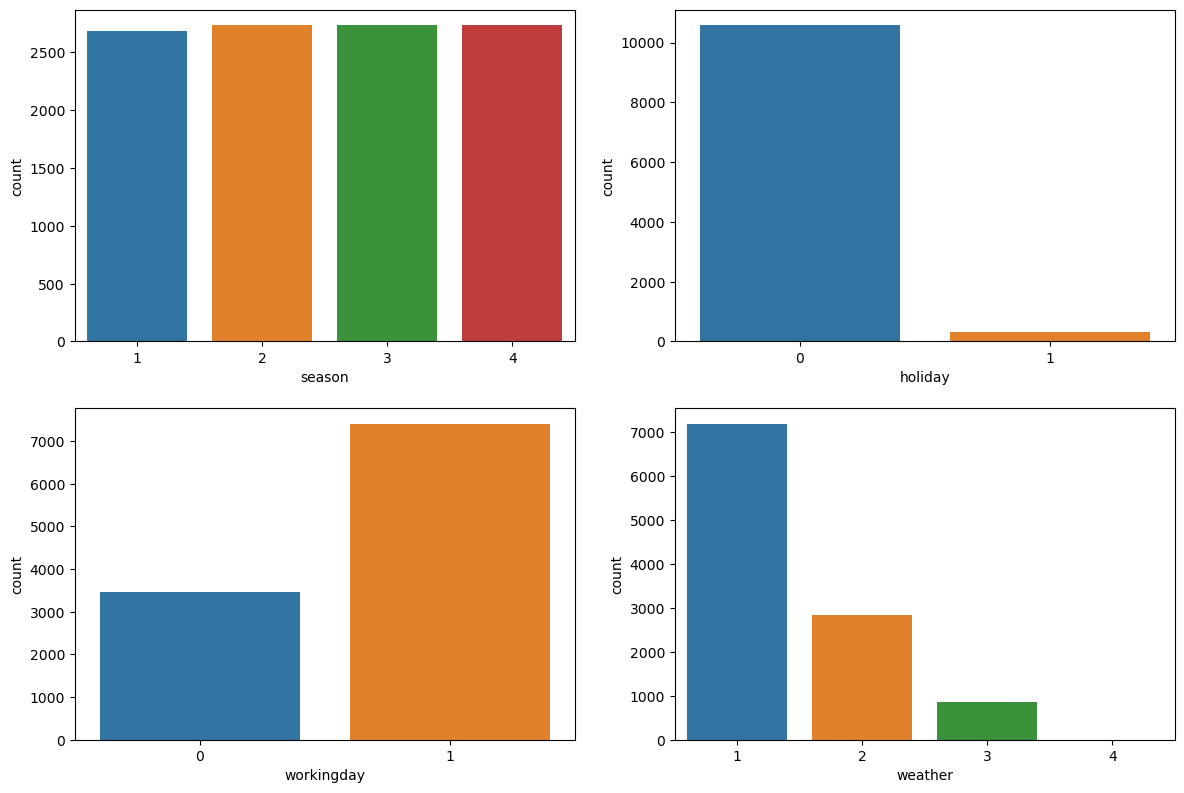

In [352]:
# count plot for categorical variables
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(cat_cols)+1):
    plt.subplot(5,2,plot)
    sns.countplot(data = df,
                  x = cat_cols[plot-1])

### Observations

1. No. of bikes rented during different seasons are almost same.
2. No. of bikes rented on regular days (non-holiday) is higher than on holidays.
3. No. of bikes rented on weekdays is higher than on weekends.
4. No. of bikes rented during weather 1 (i.e. when weather is Clear or partly cloud) is higher than during any other weather. Almost none bikes were rented during weather 4.



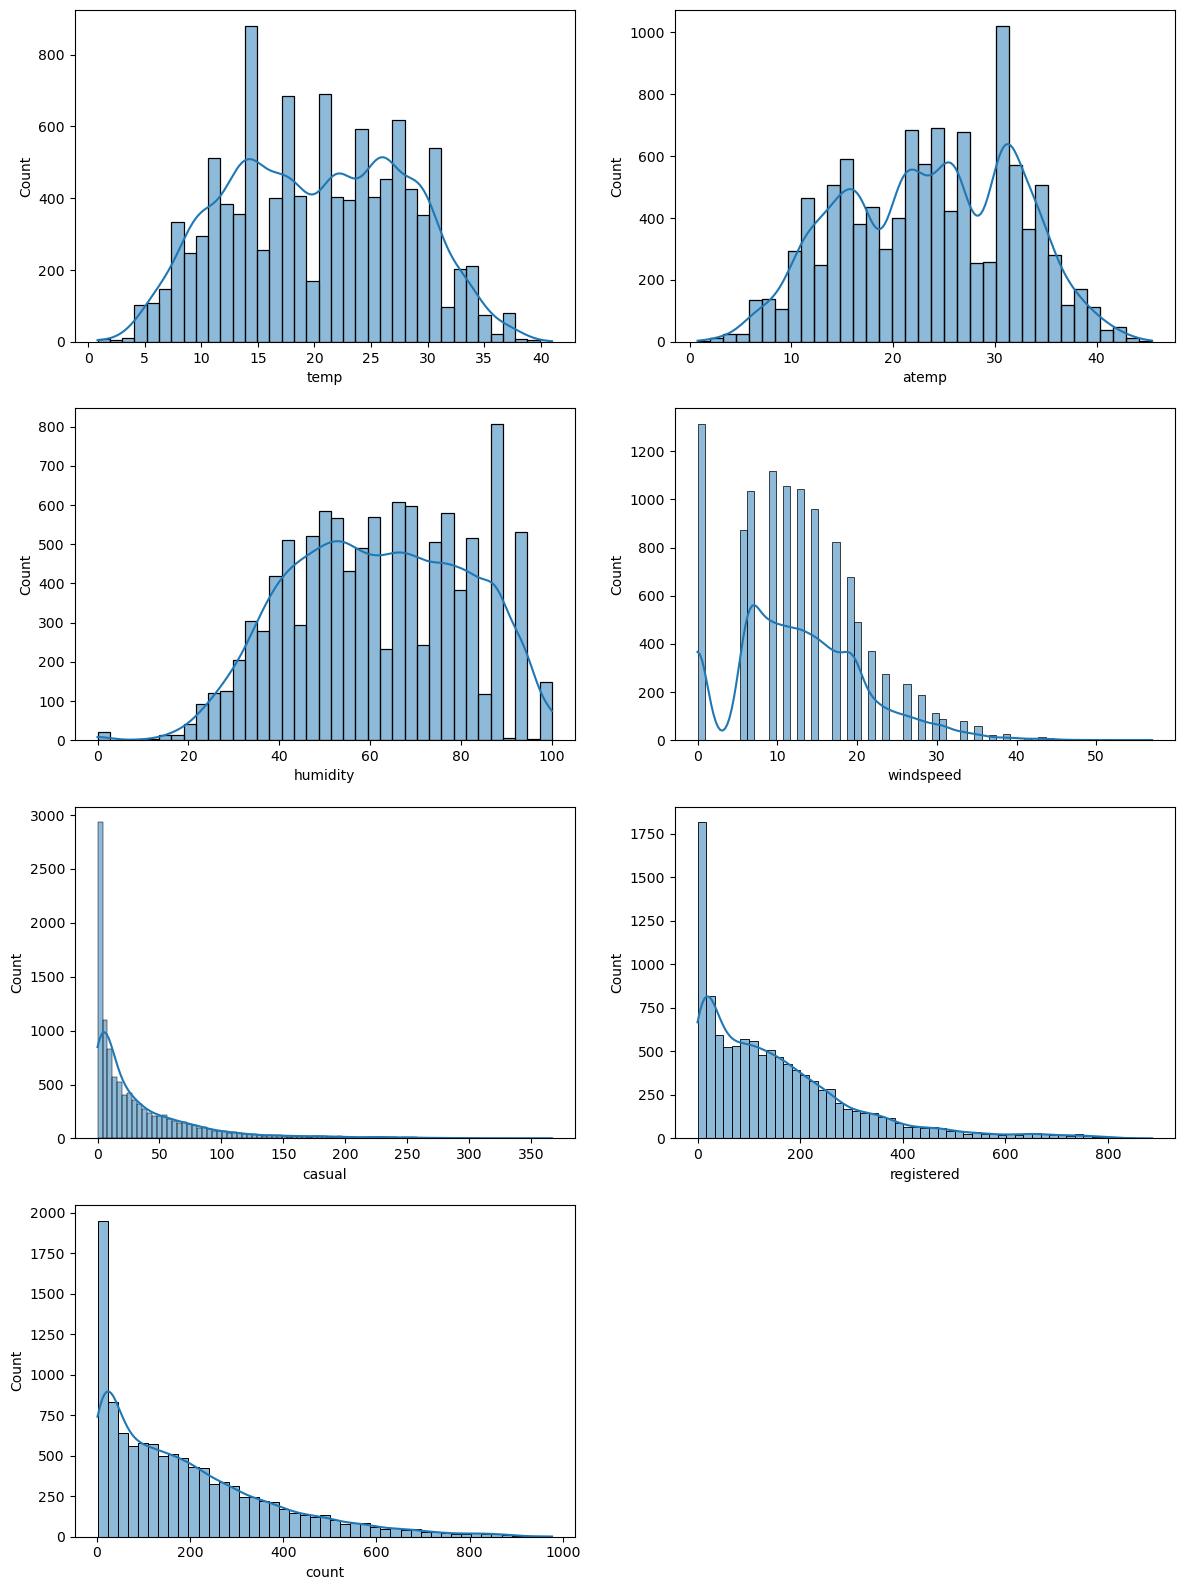

In [353]:
# distribution plot for continuous/ numerical variables
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(5,2,plot)
    sns.histplot(data = df,
                  x = num_cols[plot-1],
                kde=True)

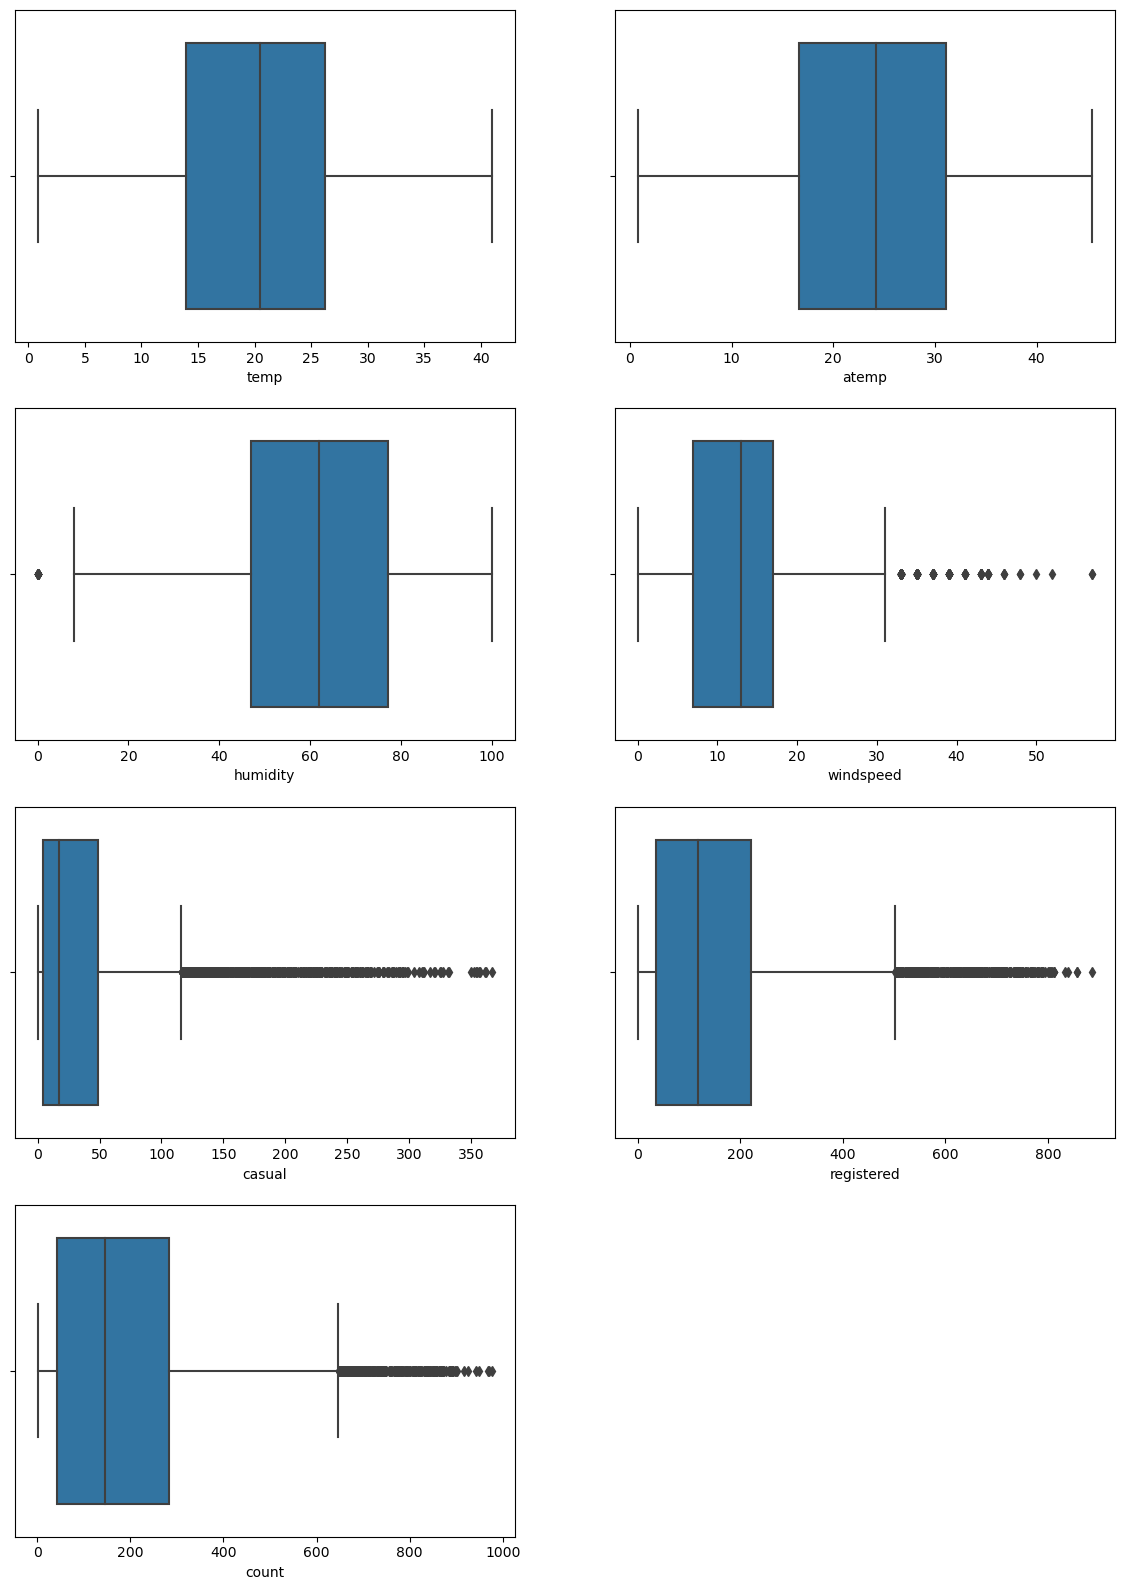

In [354]:
# outlier detection

fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(5,2,plot)
    sns.boxplot(data = df,
                  x = num_cols[plot-1])

### Obersvations

1. temp and atemp are more or less symmetrically distributed with no skewness and does not have outliers.
2. humidity is left skewed and windspeed is right skewed and both have some outliers.
3. casual and registered both are right skewed and have outliers. Also, count is the sum of casual and registered users. That's why it is right skewed and has outliers.

## Bivariate Analysis

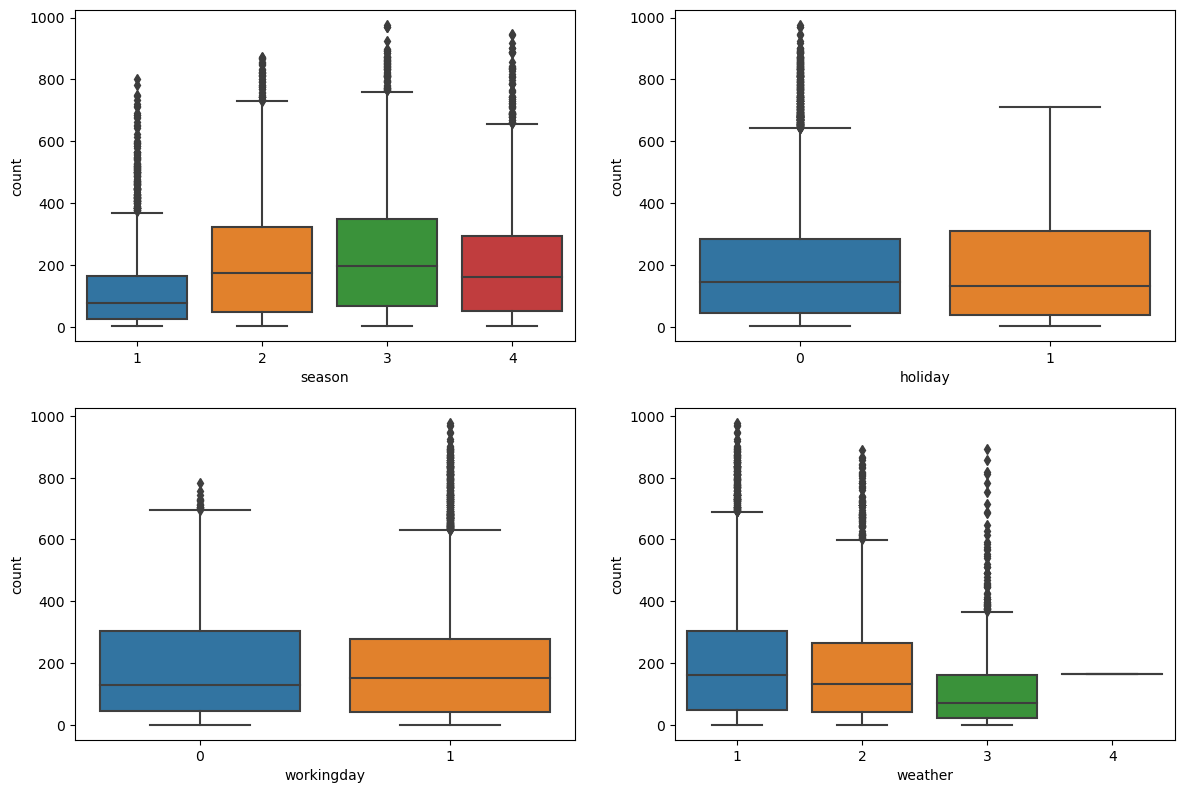

In [355]:
# Outlier Detection

fig = plt.figure(figsize = (8,25))
fig.subplots_adjust(right = 1.5)
for plot in range(1,len(cat_cols)+1):
    plt.subplot(5,2,plot)
    sns.boxplot(data = df,
                x = cat_cols[plot-1],
                y = 'count'
                )

### Observations

1. Demand of bikes for rent is higher during 3rd and 2nd season with respect to 4th and 1st season.
2. Demand of bikes for rent during holiday or non-holiday day is almost same.
3. Demand of bikes for rent during working day or non-workingday is almost same.
4. Demand of bikes for rent during weather 1 is comparetively higher than during weather 2 or 3. Also, there were almost none bikes were demanded for rent during weather 4.5

We can see outliers are present. We can not remove these outliers as on some days the number of electric bicycles rented would be way more than normally rented.

### Multi-variate Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_1524\389968720.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True,cmap='Blues')


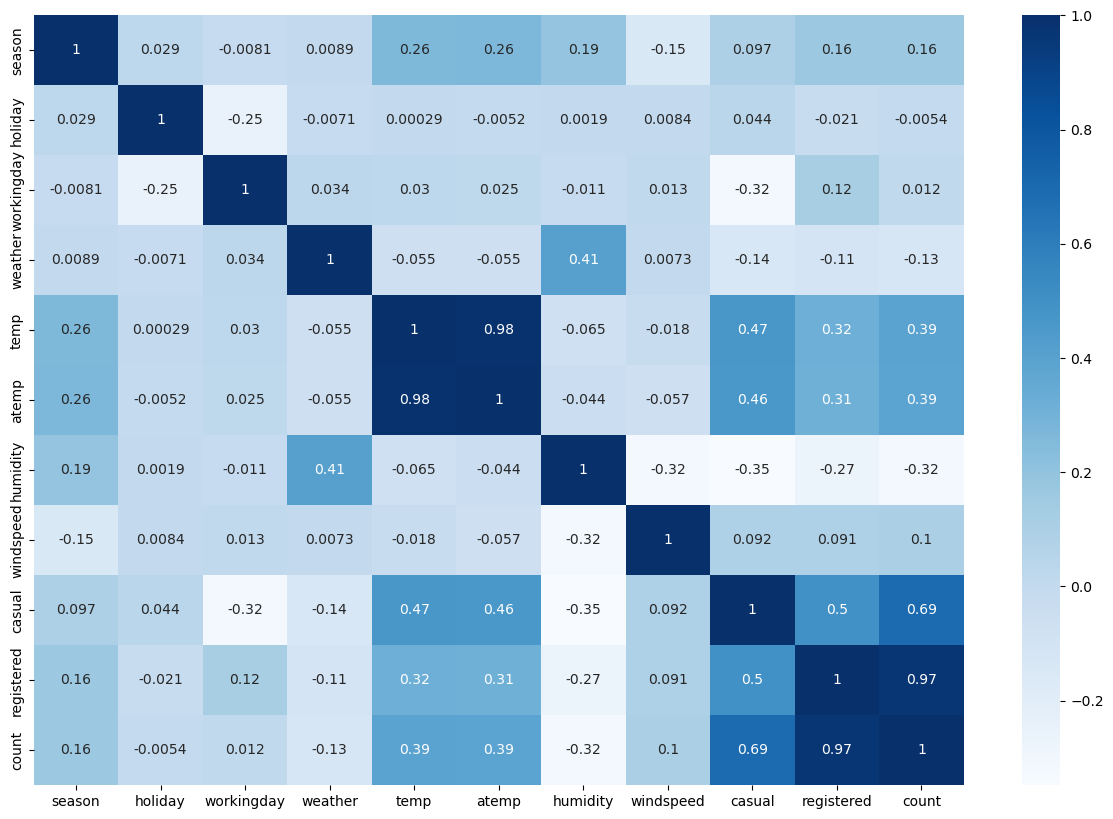

In [356]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot= True,cmap='Blues')
plt.show()

### Observations

1. temp and atemp are highly correlated.
2. casual and count; registered and count - these both are highly correlated.

####

- 'temp' and 'atemp' are almost same. So, dropping 'atemp' to avoid confusion. Also, 'count' is the sum of 'casual' and 'registered' columns. So, 'casual' and 'registered' will be removed.

In [357]:
df_new = df.drop(columns=['atemp','casual','registered'])

<Axes: xlabel='season', ylabel='count'>

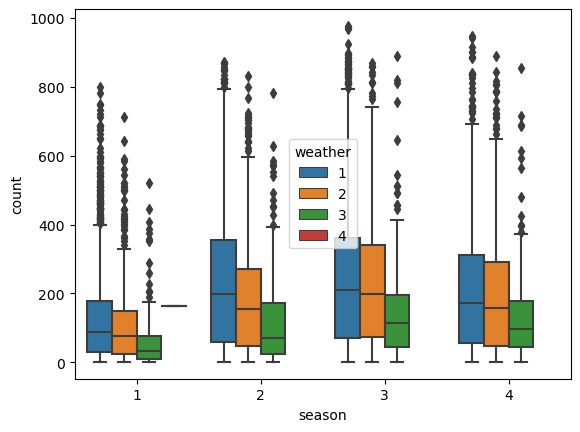

In [358]:

sns.boxplot(data = df,
            x = 'season',
            y = 'count',
            hue = 'weather')

## Answering some statistical questions

### Q.1 Does 'working day' has effect on number of electric cycles rented?

**Defining Null and Alternate Hypothesis**

**H0 :** Demand of electric cycle on weekdays is similar or more than on weekends.(i.e. mu1 >= mu2)

**Ha :** Demand of electric cycle on weekdays is less than demand on weekends.(i.e. mu1 < mu2)

To test the above Hypothesis, we will use **Two sample T-test** as the standard deviation of the population is not known.

In [359]:
df_new.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


We can see that the average number bicycles rented on working day is more than bicycles rented on weekend. Now, we will see if this is statistically significant or not.

In [360]:
weekday = df_new[df_new['workingday'] == 1]['count'].sample(2500)
weekend = df_new[df_new['workingday'] == 0]['count'].sample(2500)

Significance level, alpha = 0.05

In [361]:
# Calculating p_value

test_stat,p_value = ttest_ind(weekday,weekend,alternative ='less')
alpha = 0.05

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis'.format(p_value))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis'.format(p_value,alpha))

The p_value is 0.885878587908121
The p_value 0.89 is greater than significance value 0.05, we fail to reject the null hypothesis


**Observations**

Since the p_value is greater than 5% significance level, we fail to reject null hypothesis, i.e, there is enough statistical evidence to prove that the average number bicycles rented on weekdays is more than those on weekends.

### Q.2 Is number of cycles rented in different weather similar or different? 

**Defining Null and Alternate Hypothesis**

**H0 :** The average number of cycles rented in different weather are equal.

**Ha :** The average number of cycles rented in different weather are not equal.

To test the above Hypothesis, we will use **ANOVA test** as there are 3 independent weather conditions. We will not consider the weather 4 as the sample size is too low.


In [362]:
df_new.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


We can see that the average number bicycles rented in different weather conditions is different. Now, we will see if this is statistically significant or not.

In [363]:
weather_1 = df_new[df_new['weather'] == 1]['count'].sample(500)
weather_2 = df_new[df_new['weather'] == 2]['count'].sample(500)
weather_3 = df_new[df_new['weather'] == 3]['count'].sample(500)

To use **ANOVA test**, there are 3 assumptions to be satisfied.

1. Sample data should follow Gaussian Distribution. (Shapiro-Wilk's test will used to satisfy this condition)
2. Samples should be independent of each other.
3. Population variance of all the groups should be equal. (Levene test will used to satisfy this condition)

If all the 3 assumptions are satisfied, we will use **ANOVA test**, Else we will use **Kruskal Wallis Test**.

### Shapiro-Wilk's Test

**Defining Null and Alternate Hypothesis**

**H0 :** Count follows Gaussian Distribution.

**Ha :** Count does not follow Gaussian Distribution.

In [364]:
cnt = df_new['count'].sample(2500)

In [365]:
# checking normality

alpha = 0.05  # significance level

test_stat, p_value = shapiro(cnt)

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis'.format(p_value,alpha))

The p_value is 9.198823769060262e-41
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis


### Levene's Test

**Defining Null and Alternate Hypothesis**

**H0 :** Variances for different weather are equal

**Ha :** Variances for different weather are not equal

In [366]:
# checking variance

alpha = 0.05  # significance level

test_stat, p_value = levene(weather_1,weather_2,weather_3)

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis'.format(p_value,alpha))

The p_value is 3.268706380552605e-15
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis


**Observations**

1. Sample Data does not follow Gaussian Distribution.
2. Variances for different weather are different.

So, these both assumptions does not satify to use ANOVA Test. We will use Kruskal-Wallis Test here.

### Kruskal-Wallis Test

**Defining Null and Alternate Hypothesis**

**H0 :** The average number of cycles rented in different weather are equal.

**Ha :** The average number of cycles rented in different weather are not equal.

In [367]:

alpha = 0.05  # significance level

test_stat, p_value = kruskal(weather_1,weather_2,weather_3)

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis.'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis.'.format(p_value,alpha))

The p_value is 1.481104424519103e-21
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis.


**Observations**

Since the p_value is less than 5% significance level, we reject null hypothesis, i.e, there is enough statistical evidence to prove that the average number bicycles rented during different weather are not equal.

### Q.3 Is number of cycles rented in different season similar or different? 

**Defining Null and Alternate Hypothesis**

**H0 :** The average number of cycles rented in different season are equal.

**Ha :** The average number of cycles rented in different season are not equal.

To test the above Hypothesis, we will use **ANOVA test** as there are 4 independent seasons.


In [368]:
df_new.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


We can see that the average number bicycles rented in different season does not vary much. Now, we will see if this is statistically significant or not.

In [369]:
season_1 = df_new[df_new['season'] == 1]['count'].sample(1000)
season_2 = df_new[df_new['season'] == 2]['count'].sample(1000)
season_3 = df_new[df_new['season'] == 3]['count'].sample(1000)
season_4 = df_new[df_new['season'] == 4]['count'].sample(1000)

To use ANOVA test, there are 3 assumptions to be satisfied.

1. Sample data should follow Gaussian Distribution. (Shapiro-Wilk's test will used to satisfy this condition)
2. Samples should be independent of each other.
3. Population variance of all the groups should be equal. (Levene test will used to satisfy this condition)

If all the 3 assumptions are satisfied, we will use ANOVA test, Else we will use **Kruskal Wallis Test**.

### Shapiro-Wilk's Test

**Defining Null and Alternate Hypothesis**

**H0 :** Count follows Gaussian Distribution.

**Ha :** Count does not follow Gaussian Distribution.

In [370]:
cnt = df_new['count'].sample(2500)

In [371]:
# checking normality

alpha = 0.05  # significance level

test_stat, p_value = shapiro(cnt)

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis'.format(p_value,alpha))

The p_value is 1.4999498762132842e-41
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis


### Levene's Test

**Defining Null and Alternate Hypothesis**

**H0 :** Variances for different season are equal

**Ha :** Variances for different season are not equal

In [372]:
# checking variance

alpha = 0.05  # significance level

test_stat, p_value = levene(season_1,season_2,season_3,season_4)

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis'.format(p_value,alpha))

The p_value is 1.9676338880400957e-45
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis


**Observations**

1. Sample Data does not follow Gaussian Distribution.
2. Variances for different weather are different.

So, these both assumptions does not satify to use ANOVA Test. We will use Kruskal-Wallis Test here.

### Kruskal-Wallis Test

**Defining Null and Alternate Hypothesis**

**H0 :** The average number of cycles rented in different season are equal.

**Ha :** The average number of cycles rented in different season are not equal.

In [373]:

alpha = 0.05  # significance level

test_stat, p_value = kruskal(season_1,season_2,season_3,season_4)

print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis.'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis.'.format(p_value,alpha))

The p_value is 1.191563756468903e-51
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis.


**Observations**

Since the p_value is less than 5% significance level, we reject null hypothesis, i.e, there is enough statistical evidence to prove that the average number bicycles rented during different season are not equal.

### Q.4. Is weather dependent on season?

In [374]:

df_new['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [375]:
df_new['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

We will use **Chi-Sqaure Test** to check if weather is dependent on season.

To use Chi-square below assumptions needs to be true:

1. Both variables should be categorical.
2. Expected value of each cell should be greater or equal to 5.

We will drop the weather 4 as it contain only 1 record.

In [376]:
# dropping the weather 4, as it has only 1 record.
df_new.drop(df_new[df_new['weather'] == 4].index,inplace=True)


In [377]:
w_s = pd.crosstab(index = df_new['weather'],columns = df_new['season'])
w_s

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


**Defining Null and Alternate Hypothesis**

**H0 :** Weather has no impact on the number of bicycles rented during any season.

**Ha :** Weather impacts on the number of bicycles rented during any season.

In [378]:
chi_stat,p_value,df,expected_value = chi2_contingency(w_s)

alpha = 0.05
print('The p_value is {}'.format(p_value))

if p_value < alpha:
    print('The p_value {:.2f} is less than significance value {}, we reject the null hypothesis.'.format(p_value,alpha))
else:
    print('The p_value {:.2f} is greater than significance value {}, we fail to reject the null hypothesis.'.format(p_value,alpha))

The p_value is 2.8260014509929403e-08
The p_value 0.00 is less than significance value 0.05, we reject the null hypothesis.


**Observations**

Since the p_value is less than 5% significance level, we reject null hypothesis, i.e, there is enough statistical evidence to prove that the the no. of bicycles rented during a season is dependent on weather.


We can observe that during any season if the weather condition is 'Clear, Few clouds, partly cloudy, partly cloudy', the demand for bicycles increases.

## Insights

1. The demand of electric bicycles rented on weekdays are more than on weekends.
2. Weather plays an important role in the demand of number of electric bicycles booked.
3. The demand of electric bicycles rented during different seasons are different.
4. Weather is dependent on season,i.e., if a weather is good in any season the demand for bicycles increases.

## Recommendations

1. The demand of bicycles on rent are usually higher during Weekdays.
2. The demand of bicycles on rent are usually higher during Regular days.
3. The chances of person renting a bike are usually higher during Season 3.
4. The chances of person renting a bike are usually higher during Weather condition 1.

So, during the times of high demand company should maintain the high supply of bicycles accordingly.